# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [8]:
df.shape

(50000, 14)

The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [9]:
df.head(2)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0


In [10]:
catCols = df.select_dtypes(include="object").columns
numCols = df.select_dtypes(exclude="object").columns

In [11]:
# for cols in catCols:
#     print('-'*50)
#     print(df[cols].unique())

In [12]:
# for cols in numCols:
#     print('-'*50)
#     print(f'{cols} : ', df[cols].unique())

In [13]:
df['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

# EDA

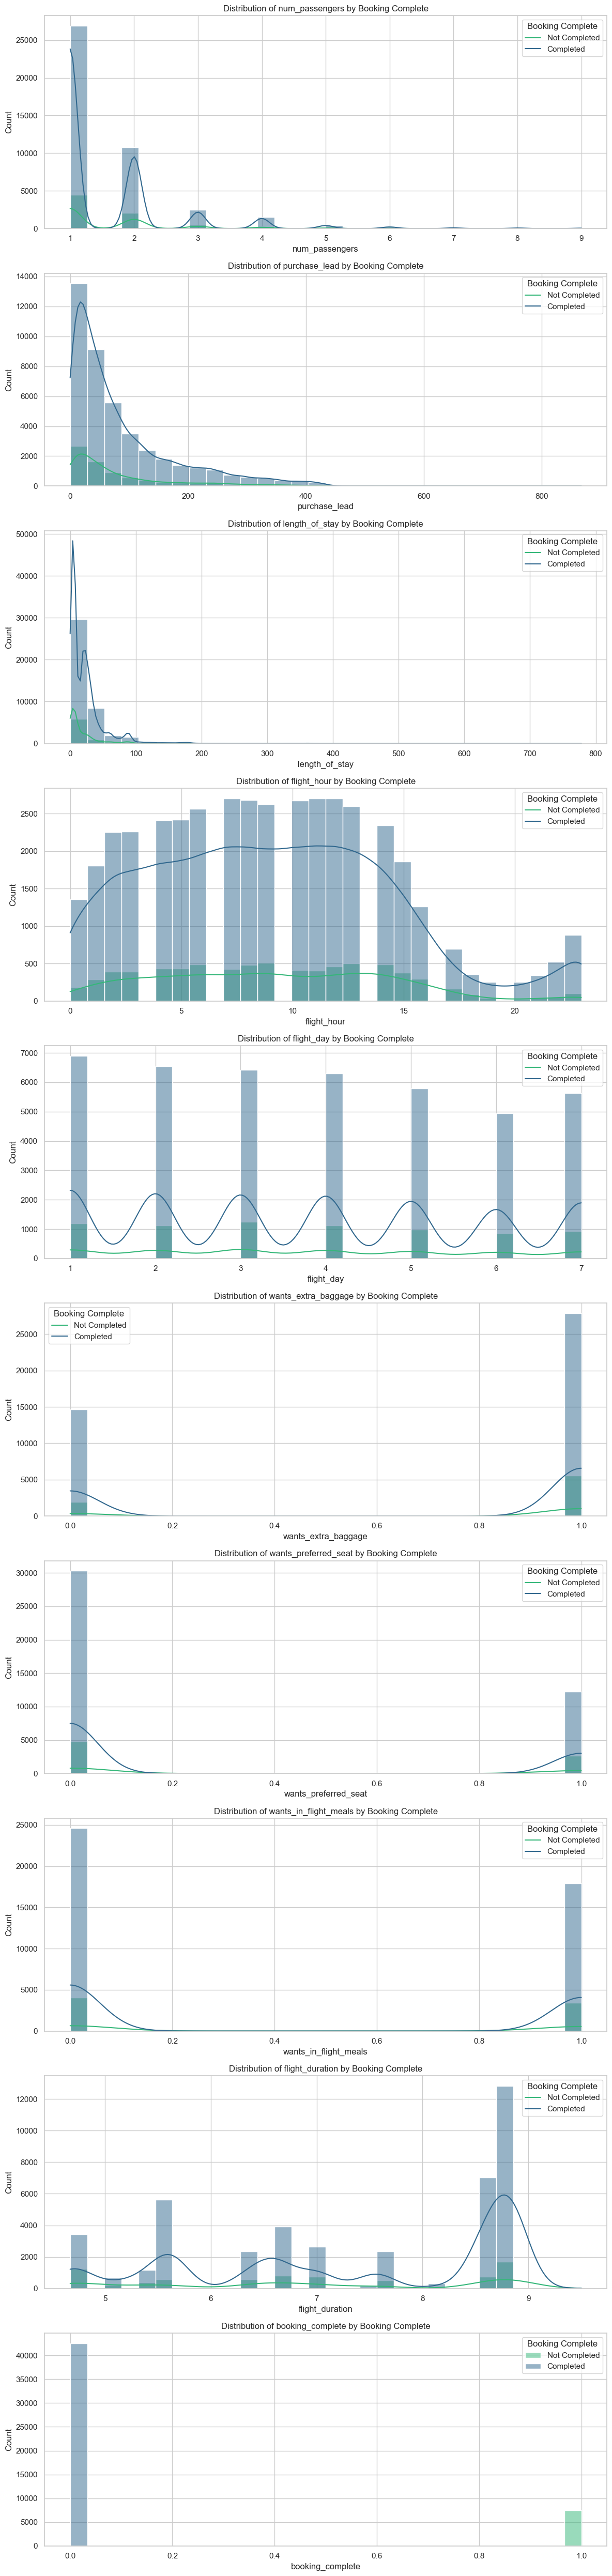

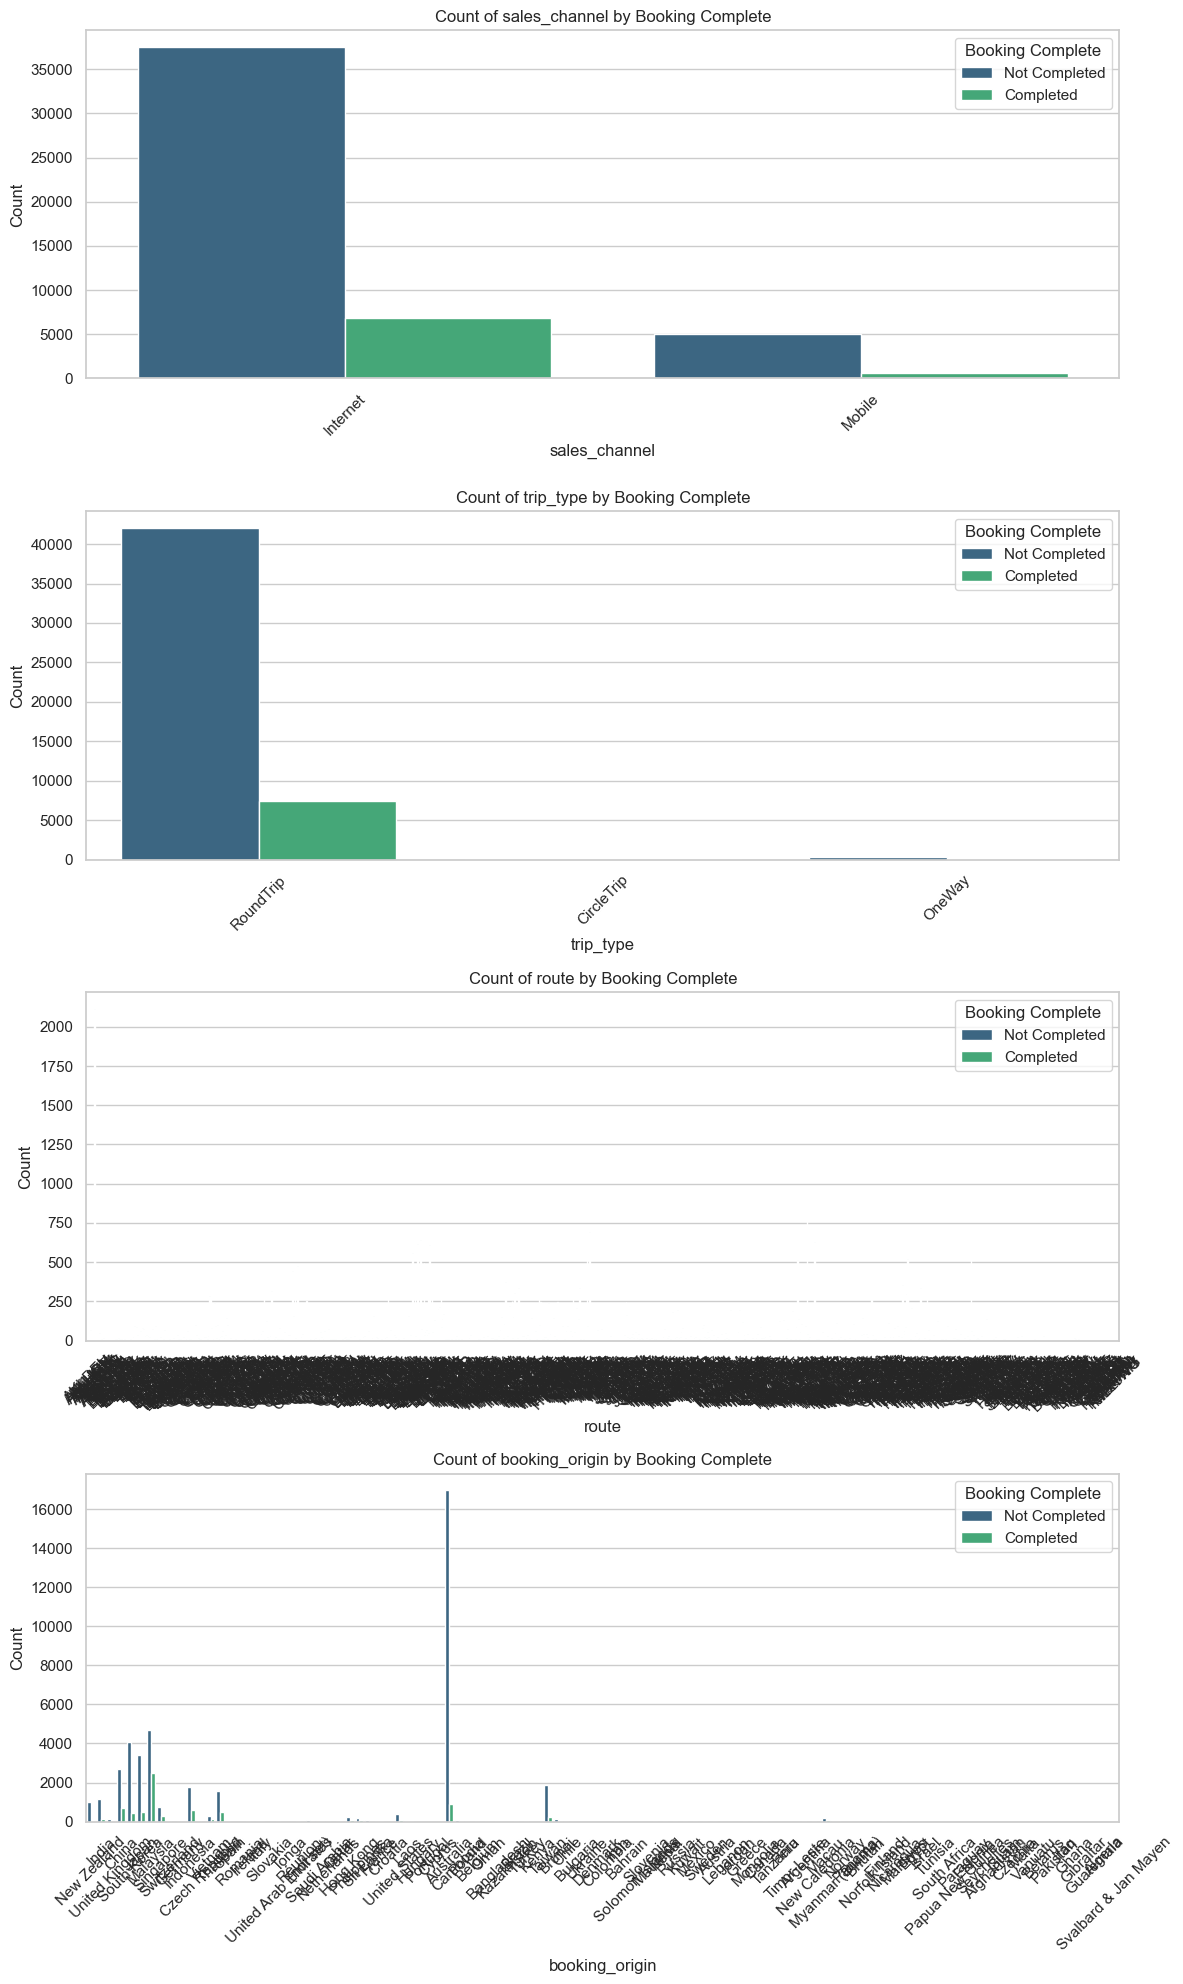

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set gaya plot
sns.set(style="whitegrid")

# Subplot untuk fitur numerik
fig, axes = plt.subplots(len(numCols), 1, figsize=(12, 5 * len(numCols)))
for i, feature in enumerate(numCols):
    sns.histplot(data=df, x=feature, hue='booking_complete', kde=True, bins=30, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {feature} by Booking Complete')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Booking Complete', labels=['Not Completed', 'Completed'])
plt.tight_layout()
plt.show()

# Subplot untuk fitur kategorikal
fig, axes = plt.subplots(len(catCols), 1, figsize=(12, 5 * len(catCols)))
for i, feature in enumerate(catCols):
    sns.countplot(data=df, x=feature, hue='booking_complete', ax=axes[i], palette='viridis')
    axes[i].set_title(f'Count of {feature} by Booking Complete')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Booking Complete', labels=['Not Completed', 'Completed'])
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [15]:
df['isAlone'] = (df['num_passengers'] > 1).astype(int)
df['lessThan20'] = ((df['flight_hour'] >= 0) & (df['flight_hour'] <= 16)).astype(int)
df['extra_services'] = (
    df['wants_extra_baggage'] + 
    df['wants_preferred_seat'] + 
    df['wants_in_flight_meals']
)
df['flight_day_type'] = df['flight_day'].apply(lambda x : 'Weekday' if x in [1,2,3,4,5] else 'Weekend')

In [16]:
# Mapping negara ke benua
country_to_continent = {
    'New Zealand': 'Oceania',
    'India': 'Asia',
    'United Kingdom': 'Europe',
    'China': 'Asia',
    'South Korea': 'Asia',
    'Japan': 'Asia',
    'Malaysia': 'Asia',
    'Singapore': 'Asia',
    'Switzerland': 'Europe',
    'Germany': 'Europe',
    'Indonesia': 'Asia',
    'Czech Republic': 'Europe',
    'Vietnam': 'Asia',
    'Thailand': 'Asia',
    'Spain': 'Europe',
    'Romania': 'Europe',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Slovakia': 'Europe',
    'United Arab Emirates': 'Asia',
    'Tonga': 'Oceania',
    'Réunion': 'Africa',
    '(not set)': 'Unknown',
    'Saudi Arabia': 'Asia',
    'Netherlands': 'Europe',
    'Qatar': 'Asia',
    'Hong Kong': 'Asia',
    'Philippines': 'Asia',
    'Sri Lanka': 'Asia',
    'France': 'Europe',
    'Croatia': 'Europe',
    'United States': 'North America',
    'Laos': 'Asia',
    'Hungary': 'Europe',
    'Portugal': 'Europe',
    'Cyprus': 'Europe',
    'Australia': 'Oceania',
    'Cambodia': 'Asia',
    'Poland': 'Europe',
    'Belgium': 'Europe',
    'Oman': 'Asia',
    'Bangladesh': 'Asia',
    'Kazakhstan': 'Asia',
    'Brazil': 'South America',
    'Turkey': 'Asia',
    'Kenya': 'Africa',
    'Taiwan': 'Asia',
    'Brunei': 'Asia',
    'Chile': 'South America',
    'Bulgaria': 'Europe',
    'Ukraine': 'Europe',
    'Denmark': 'Europe',
    'Colombia': 'South America',
    'Iran': 'Asia',
    'Bahrain': 'Asia',
    'Solomon Islands': 'Oceania',
    'Slovenia': 'Europe',
    'Mauritius': 'Africa',
    'Nepal': 'Asia',
    'Russia': 'Europe',
    'Kuwait': 'Asia',
    'Mexico': 'North America',
    'Sweden': 'Europe',
    'Austria': 'Europe',
    'Lebanon': 'Asia',
    'Jordan': 'Asia',
    'Greece': 'Europe',
    'Mongolia': 'Asia',
    'Canada': 'North America',
    'Tanzania': 'Africa',
    'Peru': 'South America',
    'Timor-Leste': 'Oceania',
    'Argentina': 'South America',
    'New Caledonia': 'Oceania',
    'Macau': 'Asia',
    'Myanmar (Burma)': 'Asia',
    'Norway': 'Europe',
    'Panama': 'North America',
    'Bhutan': 'Asia',
    'Norfolk Island': 'Oceania',
    'Finland': 'Europe',
    'Nicaragua': 'North America',
    'Maldives': 'Asia',
    'Egypt': 'Africa',
    'Israel': 'Asia',
    'Tunisia': 'Africa',
    'South Africa': 'Africa',
    'Papua New Guinea': 'Oceania',
    'Paraguay': 'South America',
    'Estonia': 'Europe',
    'Seychelles': 'Africa',
    'Afghanistan': 'Asia',
    'Guam': 'Oceania',
    'Czechia': 'Europe',
    'Malta': 'Europe',
    'Vanuatu': 'Oceania',
    'Belarus': 'Europe',
    'Pakistan': 'Asia',
    'Iraq': 'Asia',
    'Ghana': 'Africa',
    'Gibraltar': 'Europe',
    'Guatemala': 'North America',
    'Algeria': 'Africa',
    'Svalbard & Jan Mayen': 'Europe'
}

# Tambahkan kolom benua berdasarkan mapping manual
df['continent'] = df['booking_origin'].map(country_to_continent)

In [17]:
df.drop('route',axis=1,inplace=True)

In [18]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,isAlone,lessThan20,extra_services,flight_day_type,continent
0,2,Internet,RoundTrip,262,19,7,6,New Zealand,1,0,0,5.52,0,1,1,1,Weekend,Oceania
1,1,Internet,RoundTrip,112,20,3,6,New Zealand,0,0,0,5.52,0,0,1,0,Weekend,Oceania
2,2,Internet,RoundTrip,243,22,17,3,India,1,1,0,5.52,0,1,0,2,Weekday,Asia
3,1,Internet,RoundTrip,96,31,4,6,New Zealand,0,0,1,5.52,0,0,1,1,Weekend,Oceania
4,2,Internet,RoundTrip,68,22,15,3,India,1,0,1,5.52,0,1,1,2,Weekday,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,Australia,1,0,1,5.62,0,1,1,2,Weekend,Oceania
49996,1,Internet,RoundTrip,111,6,4,7,Australia,0,0,0,5.62,0,0,1,0,Weekend,Oceania
49997,1,Internet,RoundTrip,24,6,22,6,Australia,0,0,1,5.62,0,0,0,1,Weekend,Oceania
49998,1,Internet,RoundTrip,15,6,11,1,Australia,1,0,1,5.62,0,0,1,2,Weekday,Oceania


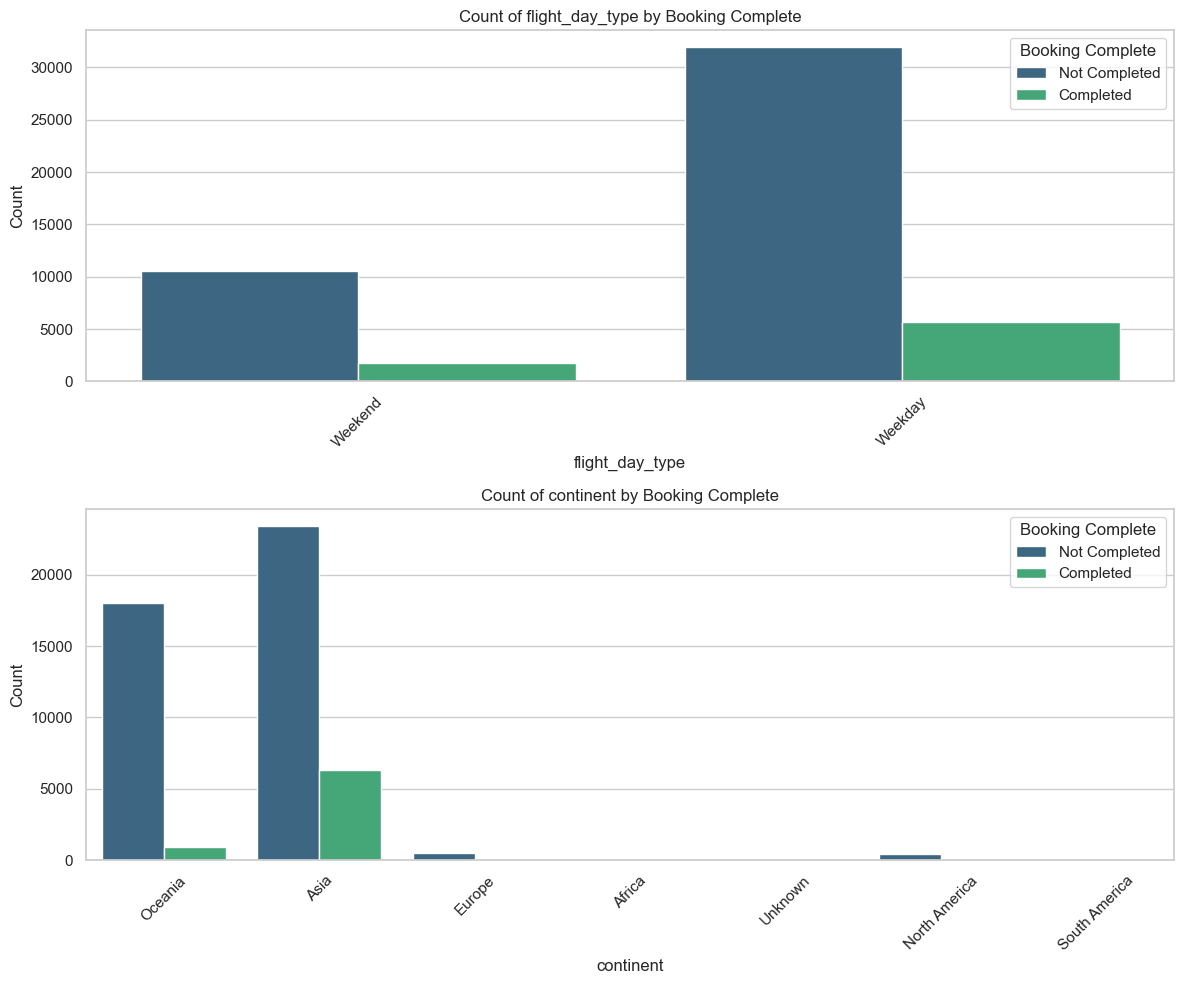

In [20]:
visualization = ['flight_day_type','continent']

# Subplot untuk fitur kategorikal
fig, axes = plt.subplots(len(visualization), 1, figsize=(12, 5 * len(visualization)))
for i, feature in enumerate(visualization):
    sns.countplot(data=df, x=feature, hue='booking_complete', ax=axes[i], palette='viridis')
    axes[i].set_title(f'Count of {feature} by Booking Complete')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Booking Complete', labels=['Not Completed', 'Completed'])
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [43]:
data = df.copy()

In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

for col in ['sales_channel', 'trip_type','flight_day_type', 'continent']:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])
    label_encoders[col] = encoder

In [45]:
data.drop('booking_origin',axis=1,inplace=True)

In [46]:
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,isAlone,lessThan20,extra_services,flight_day_type,continent
0,2,0,2,262,19,7,6,1,0,0,5.52,0,1,1,1,1,4
1,1,0,2,112,20,3,6,0,0,0,5.52,0,0,1,0,1,4
2,2,0,2,243,22,17,3,1,1,0,5.52,0,1,0,2,0,1
3,1,0,2,96,31,4,6,0,0,1,5.52,0,0,1,1,1,4
4,2,0,2,68,22,15,3,1,0,1,5.52,0,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,2,27,6,9,6,1,0,1,5.62,0,1,1,2,1,4
49996,1,0,2,111,6,4,7,0,0,0,5.62,0,0,1,0,1,4
49997,1,0,2,24,6,22,6,0,0,1,5.62,0,0,0,1,1,4
49998,1,0,2,15,6,11,1,1,0,1,5.62,0,0,1,2,0,4


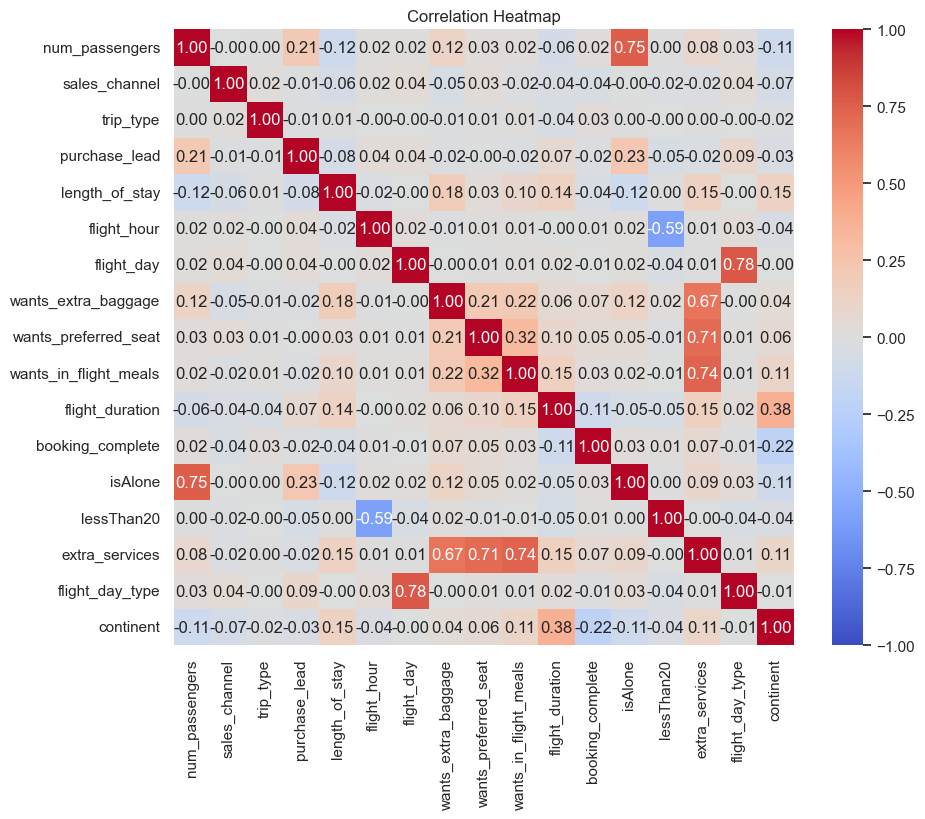

In [47]:
correlation_matrix = data.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,vmin=-1,vmax=1)
plt.title("Correlation Heatmap")
plt.show()


In [48]:
data.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
isAlone                  0
lessThan20               0
extra_services           0
flight_day_type          0
continent                0
dtype: int64

# Model Creation

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X = data.drop('booking_complete',axis=1)
y = data['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [50]:
from sklearn.ensemble import RandomForestClassifier

# Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred))


Random Forest Accuracy: 0.8479
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8498
           1       0.46      0.07      0.12      1502

    accuracy                           0.85     10000
   macro avg       0.66      0.53      0.52     10000
weighted avg       0.80      0.85      0.80     10000



In [51]:
from xgboost import XGBClassifier

# Model XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, use_label_encoder=False)
xgb_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report for XGBoost:\n", classification_report(y_test, y_pred))


XGBoost Accuracy: 0.8496
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      8498
           1       0.47      0.01      0.02      1502

    accuracy                           0.85     10000
   macro avg       0.66      0.50      0.47     10000
weighted avg       0.79      0.85      0.78     10000

 0.8496
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      8498
           1       0.47      0.01      0.02      1502

    accuracy                           0.85     10000
   macro avg       0.66      0.50      0.47     10000
weighted avg       0.79      0.85      0.78     10000



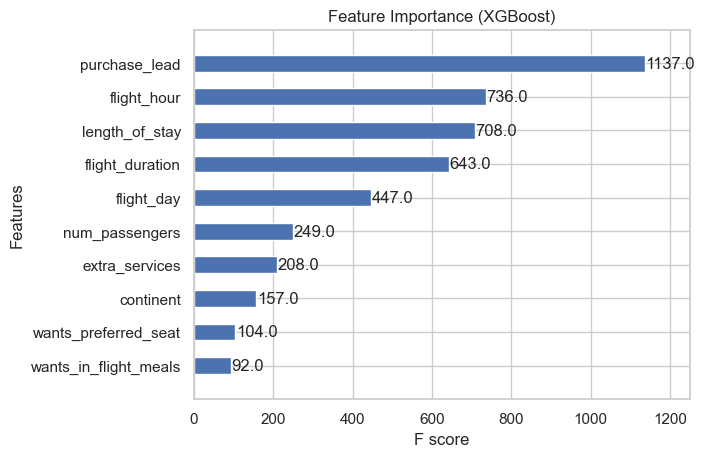

In [58]:
from xgboost import plot_importance

# Fit the model
xgb_model.fit(X_train, y_train)

# Plot feature importance
plot_importance(xgb_model, importance_type='weight', max_num_features=10, height=0.5)
plt.title("Feature Importance (XGBoost)")
plt.show()

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

# Model Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report for Gradient Boosting:\n", classification_report(y_test, y_pred))


Gradient Boosting Accuracy: 0.8494
Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      8498
           1       0.00      0.00      0.00      1502

    accuracy                           0.85     10000
   macro avg       0.42      0.50      0.46     10000
weighted avg       0.72      0.85      0.78     10000



In [53]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Definisikan model base
logreg = LogisticRegression(random_state=42, max_iter=500)
dtree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Voting Classifier
voting_model = VotingClassifier(estimators=[('lr', logreg), ('dt', dtree), ('rf', rf)], voting='hard')
voting_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = voting_model.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report for Voting Classifier:\n", classification_report(y_test, y_pred))


C:\Users\booma\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy: 0.8506
Classification Report for Voting Classifier:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8498
           1       0.53      0.05      0.10      1502

    accuracy                           0.85     10000
   macro avg       0.69      0.52      0.51     10000
weighted avg       0.81      0.85      0.80     10000



In [54]:
from sklearn.ensemble import StackingClassifier

# Definisikan model base
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Stacking Classifier
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = stacking_model.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report for Stacking Classifier:\n", classification_report(y_test, y_pred))


Stacking Classifier Accuracy: 0.8487
Classification Report for Stacking Classifier:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      8498
           1       0.45      0.03      0.06      1502

    accuracy                           0.85     10000
   macro avg       0.65      0.51      0.49     10000
weighted avg       0.79      0.85      0.79     10000



In [55]:
from catboost import CatBoostClassifier
# Initialize CatBoost model
catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=10, cat_features=[1, 2, 3, 4, 5, 6])  # Specify categorical columns

# Train the model
catboost_model.fit(X_train, y_train, cat_features=[1, 2, 3, 4, 5, 6], verbose=200)

# Make predictions
y_pred_catboost = catboost_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_catboost))

0:	learn: 0.6576013	total: 63.1ms	remaining: 31.5s
200:	learn: 0.3409494	total: 32.2s	remaining: 47.9s
400:	learn: 0.2847815	total: 1m 8s	remaining: 17s
499:	learn: 0.2605399	total: 1m 25s	remaining: 0us
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8498
           1       0.34      0.01      0.02      1502

    accuracy                           0.85     10000
   macro avg       0.60      0.50      0.47     10000
weighted avg       0.77      0.85      0.78     10000



In [56]:
import lightgbm as lgb
# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.05, max_depth=10)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 5976, number of negative: 34024
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 598
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.149400 -> initscore=-1.739315
[LightGBM] [Info] Start training from score -1.739315
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[LightGBM] [Info] Number of positive: 5976, number of negative: 34024
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 598
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.149400 -> initscore=-1.739315
[LightGBM] [Info] Start training from score -1.739315


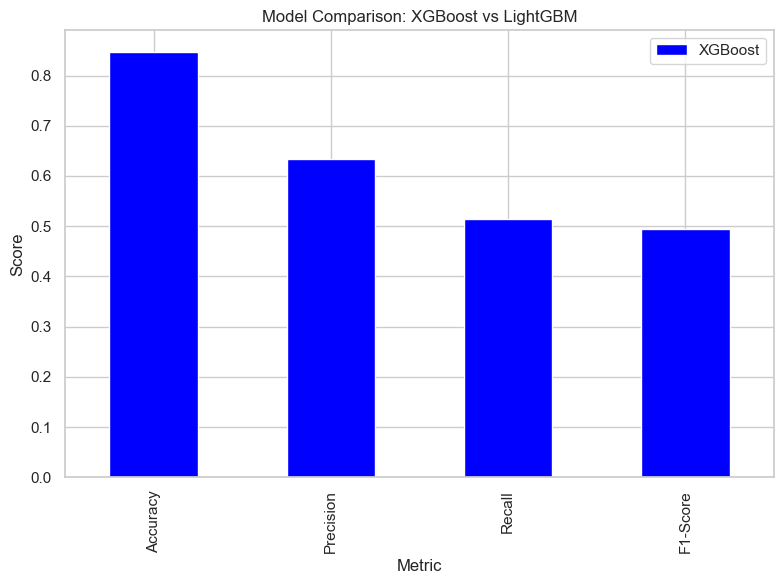

In [61]:

# 1. Train XGBoost Model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

# 2. Train LightGBM Model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
report_lgb = classification_report(y_test, y_pred_lgb, output_dict=True)

# Menyusun tabel hasil akurasi
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'XGBoost': [
        report_xgb['accuracy'], 
        report_xgb['macro avg']['precision'], 
        report_xgb['macro avg']['recall'], 
        report_xgb['macro avg']['f1-score']
    ],
}

df_comparison = pd.DataFrame(data)

# Plotting Bar chart
fig, ax = plt.subplots(figsize=(8, 6))
df_comparison.set_index('Metric').plot(kind='bar', ax=ax, color=['blue', 'orange'])
ax.set_ylabel('Score')
ax.set_title('Model Comparison: XGBoost vs LightGBM')

plt.tight_layout()
plt.show()


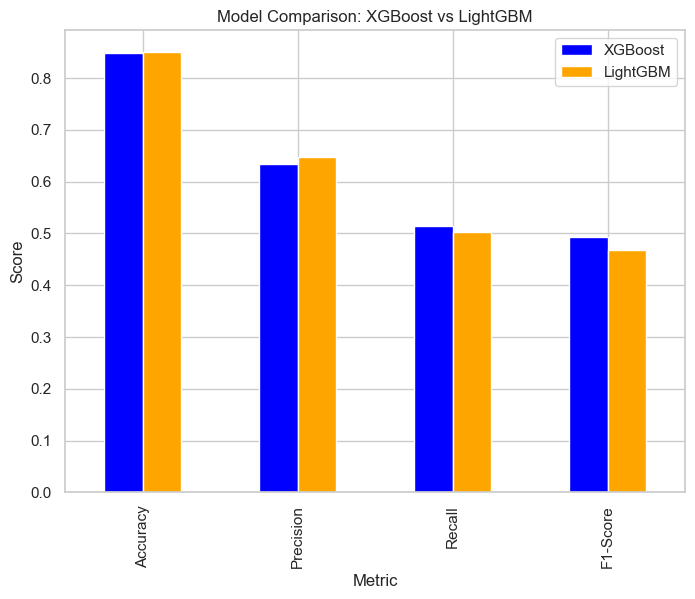

In [60]:
from pptx import Presentation
from pptx.util import Inches
import io

# Create a presentation object
prs = Presentation()

# Create a slide layout
slide = prs.slides.add_slide(prs.slide_layouts[5])

# Set title
title = slide.shapes.title
title.text = "Model Evaluation & Findings: XGBoost vs LightGBM"

# Adding performance comparison table
rows, cols = df_comparison.shape
table = slide.shapes.add_table(rows+1, cols, Inches(0.5), Inches(1.5), Inches(9), Inches(3))
table_table = table.table

# Add header to table
for col in range(cols):
    table_table.cell(0, col).text = df_comparison.columns[col]

# Add data to table
for row in range(rows):
    for col in range(cols):
        table_table.cell(row+1, col).text = str(df_comparison.iloc[row, col])

# Add the feature importance plot (saved as image)
fig, ax = plt.subplots(figsize=(8, 6))
df_comparison.set_index('Metric').plot(kind='bar', ax=ax, color=['blue', 'orange'])
ax.set_ylabel('Score')
ax.set_title('Model Comparison: XGBoost vs LightGBM')

img_stream = io.BytesIO()

fig.savefig(img_stream, format='png')
img_stream.seek(0)
slide.shapes.add_picture(img_stream, Inches(0.5), Inches(4.5), width=Inches(9))

# Save the presentation
prs.save('Model_Evaluation_Finding.pptx')
